<a href="https://colab.research.google.com/github/varalakshmiarcot/Machine-Learning/blob/master/Store_data_apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [175]:
store_data = pd.read_csv('/content/store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
store_data.shape

(7501, 20)

In [0]:
# convert pandas dataframe into a list of lists
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

In [179]:
# Transform it into the right format via the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
# Adding Transcation column
df['Transaction'] = df.index +1
df = df.set_index('Transaction')
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [180]:
# Replace True/False by 1/0
df = df*1
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


 Buliding the model and analyzing the results

In [211]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(nan, milk, ground beef, mineral water)"
511,0.017064,"(nan, spaghetti, ground beef, mineral water)"
512,0.015731,"(nan, milk, spaghetti, mineral water)"
513,0.010265,"(nan, spaghetti, olive oil, mineral water)"


In [212]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
510,0.011065,"(nan, milk, ground beef, mineral water)",4
511,0.017064,"(nan, spaghetti, ground beef, mineral water)",4
512,0.015731,"(nan, milk, spaghetti, mineral water)",4
513,0.010265,"(nan, spaghetti, olive oil, mineral water)",4


In [213]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.2) ]

,support,itemsets,length
265,0.238235,"(nan, mineral water)",2


In [214]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(barbecue sauce),(nan),0.010799,0.999867,0.010799,1.000000,1.000133,0.000001,inf
3,(nan),(barbecue sauce),0.999867,0.010799,0.010799,0.010800,1.000133,0.000001,1.000001
4,(black tea),(nan),0.014265,0.999867,0.014265,1.000000,1.000133,0.000002,inf
5,(nan),(black tea),0.999867,0.014265,0.014265,0.014267,1.000133,0.000002,1.000002
6,(body spray),(nan),0.011465,0.999867,0.011465,1.000000,1.000133,0.000002,inf
7,(nan),(body spray),0.999867,0.011465,0.011465,0.011467,1.000133,0.000002,1.000002
8,(brownies),(nan),0.033729,0.999867,0.033729,1.000000,1.000133,0.000004,inf
9,(nan),(brownies),0.999867,0.033729,0.033729,0.033733,1.000133,0.000004,1.000005


In [215]:
rules.sort_values('confidence', ascending  = True, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1039,(nan),"(low fat yogurt, frozen vegetables)",0.999867,0.010132,0.010132,0.010133,1.000133,0.000001,1.000001
1581,(nan),"(spaghetti, french fries, mineral water)",0.999867,0.010132,0.010132,0.010133,1.000133,0.000001,1.000001
1542,(nan),"(ground beef, eggs, mineral water)",0.999867,0.010132,0.010132,0.010133,1.000133,0.000001,1.000001
749,(nan),"(soup, chocolate)",0.999867,0.010132,0.010132,0.010133,1.000133,0.000001,1.000001
525,(nan),"(cake, frozen vegetables)",0.999867,0.010265,0.010265,0.010267,1.000133,0.000001,1.000001
559,(nan),"(cereals, mineral water)",0.999867,0.010265,0.010265,0.010267,1.000133,0.000001,1.000001
1405,(nan),"(spaghetti, red wine)",0.999867,0.010265,0.010265,0.010267,1.000133,0.000001,1.000001
1664,(nan),"(spaghetti, olive oil, mineral water)",0.999867,0.010265,0.010265,0.010267,1.000133,0.000001,1.000001
365,(nan),(nonfat milk),0.999867,0.010399,0.010399,0.010400,1.000133,0.000001,1.000001
947,(nan),"(grated cheese, french fries)",0.999867,0.010399,0.010399,0.010400,1.000133,0.000001,1.000001


In [216]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
842,"(herb & pepper, eggs)",(nan),0.012532,0.999867,0.012532,1.0,1.000133,0.000002,inf
80,(chicken),(nan),0.059992,0.999867,0.059992,1.0,1.000133,0.000008,inf
58,(carrots),(nan),0.015331,0.999867,0.015331,1.0,1.000133,0.000002,inf
442,"(burgers, eggs)",(nan),0.028796,0.999867,0.028796,1.0,1.000133,0.000004,inf
902,"(tomatoes, eggs)",(nan),0.012265,0.999867,0.012265,1.0,1.000133,0.000002,inf


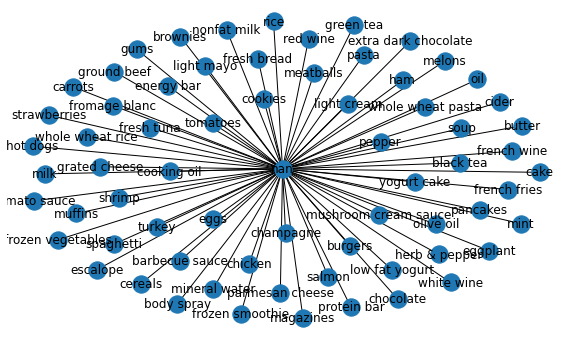

In [217]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)